# Christie Woodside Homework 8 Problem Set 1 - EJI Clustering

In [82]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

eji_data = pd.read_csv('United States.csv')
'''DATA DICTIONARY: https://eji.cdc.gov/Documents/Data/2022/EJI_2022_Data_Dictionary_508.pdf'''

'DATA DICTIONARY: https://eji.cdc.gov/Documents/Data/2022/EJI_2022_Data_Dictionary_508.pdf'

In [83]:
print(eji_data.head(5))

   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

    COUNTY StateAbbr StateDesc                                   Location  \
0  Autauga        AL   Alabama  Census Tract 201, Autauga County, Alabama   
1  Autauga        AL   Alabama  Census Tract 202, Autauga County, Alabama   
2  Autauga        AL   Alabama  Census Tract 203, Autauga County, Alabama   
3  Autauga        AL   Alabama  Census Tract 204, Autauga County, Alabama   
4  Autauga        AL   Alabama  Census Tract 205, Autauga County, Alabama   

   ...  EP_BPHIGH  EP_ASTHMA  EP_CANCER  EP_MHLTH  EP_DIABETES  EPL_BPHIGH  \
0  ...       3

Printing the first 5 rows of a dataset is important to understand the contents and verify information. This way you can see the column headers, the kinds of data in each column, and how the data is structured. We can also verify if this is the correct data we are expecting. We can also potentially see problems with the data and what we may need to fix or restructure.

## Working with SPL Columns

In [84]:
spl_columns = [col for col in eji_data.columns if col.startswith("SPL_")]
df_spl = eji_data[spl_columns]
print(df_spl.head(5))


   SPL_EJI  SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  SPL_EBM_THEME3  \
0   1.1229   0.9229          2.1531          0.5940          1.9346   
1   1.9108   1.1108          2.1998          0.6609          1.7326   
2   1.6226   1.0226          2.2967          0.5157          1.7550   
3   1.1659   0.7659          2.4259          0.3978          2.0880   
4   0.9289   0.9289          2.4915          0.4588          1.6598   

   SPL_EBM_THEME4  SPL_EBM_THEME5  SPL_EBM  SPL_SVM_DOM1  SPL_SVM_DOM2  \
0          1.1597             0.0   5.8414        0.3243        3.6376   
1          0.9368             0.0   5.5301        0.7564        4.4555   
2          1.3287             0.0   5.8961        0.5537        3.2509   
3          1.2016             0.0   6.1133        0.2092        2.2288   
4          1.1335             0.0   5.7436        0.4921        2.7432   

   SPL_SVM_DOM3  SPL_SVM_DOM4  SPL_SVM  
0        1.6464        0.8763   6.4846  
1        1.3666        1.5249   8.1034  
2    

In [85]:
add_c= ['STATEFP', 'COUNTYFP','StateAbbr', 'StateDesc', "COUNTY",'TRACTCE', 'GEOID']
df_spl = eji_data[spl_columns + add_c]
print(df_spl.head(5))

   SPL_EJI  SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  SPL_EBM_THEME3  \
0   1.1229   0.9229          2.1531          0.5940          1.9346   
1   1.9108   1.1108          2.1998          0.6609          1.7326   
2   1.6226   1.0226          2.2967          0.5157          1.7550   
3   1.1659   0.7659          2.4259          0.3978          2.0880   
4   0.9289   0.9289          2.4915          0.4588          1.6598   

   SPL_EBM_THEME4  SPL_EBM_THEME5  SPL_EBM  SPL_SVM_DOM1  SPL_SVM_DOM2  \
0          1.1597             0.0   5.8414        0.3243        3.6376   
1          0.9368             0.0   5.5301        0.7564        4.4555   
2          1.3287             0.0   5.8961        0.5537        3.2509   
3          1.2016             0.0   6.1133        0.2092        2.2288   
4          1.1335             0.0   5.7436        0.4921        2.7432   

   SPL_SVM_DOM3  SPL_SVM_DOM4  SPL_SVM  STATEFP  COUNTYFP StateAbbr StateDesc  \
0        1.6464        0.8763   6.4846        1

The purpose to add these columsn is to have the location names and information so we can specifiy the exact state and county for the SPL information. This data can also be used to filter SPL information according to these additional columns. The GEOID specifically could allow for extra analysis such as mapping or spatial analysis.

## Data Cleaning

In [86]:
missing_val = df_spl.isnull().sum()
missing_col = missing_val[missing_val > 0]
print(missing_col)

#see the rows information that are missing some data
rows_with_missing = df_spl[df_spl.isnull().any(axis=1)]
print(rows_with_missing.head())

SPL_EJI           656
SPL_SER           609
SPL_EBM_THEME1    296
SPL_EBM_THEME2     73
SPL_EBM_THEME3    567
SPL_EBM_THEME4     73
SPL_EBM_THEME5     73
SPL_EBM           579
SPL_SVM_DOM2      601
SPL_SVM_DOM3      406
SPL_SVM_DOM4      564
SPL_SVM           601
StateAbbr         480
dtype: int64
     SPL_EJI  SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  SPL_EBM_THEME3  \
105      NaN      NaN          2.0676          3.2515             NaN   
106      NaN      NaN          1.9554          0.4941             NaN   
107      NaN      NaN             NaN          0.0000             NaN   
804      NaN      NaN          2.3610          0.9928             NaN   
867      NaN      NaN             NaN             NaN             NaN   

     SPL_EBM_THEME4  SPL_EBM_THEME5  SPL_EBM  SPL_SVM_DOM1  SPL_SVM_DOM2  \
105          0.8475          0.3092      NaN        0.0000           NaN   
106          0.4922          0.3332      NaN        0.0000           NaN   
107          0.2867          0.293

Missing values can throw errors in my analysis and mess with the accuracy of my results. Some analysis also requires complete datasets so of there is missing information then the analysis will not run. Also knowing which data is missing cna help me better understand how to address it and fix it accordingly. This helps for the intergrity of the results and analyis. The missing values are displayed as Nans.

In [87]:
print("# of rows before cleaning:", df_spl.shape[0])
spl_clean = df_spl.dropna()

print("\n# of rows after cleaning:", spl_clean.shape[0])
print("\n# of rows removed:", df_spl.shape[0]-spl_clean.shape[0])

any_missing = spl_clean[spl_clean.isnull().any(axis=1)]
print("\n",'check if there are still nans:', any_missing.head())

print("\n ---------------New Clean DF-----------------\n",spl_clean.head())

# of rows before cleaning: 72333

# of rows after cleaning: 71677

# of rows removed: 656

 check if there are still nans: Empty DataFrame
Columns: [SPL_EJI, SPL_SER, SPL_EBM_THEME1, SPL_EBM_THEME2, SPL_EBM_THEME3, SPL_EBM_THEME4, SPL_EBM_THEME5, SPL_EBM, SPL_SVM_DOM1, SPL_SVM_DOM2, SPL_SVM_DOM3, SPL_SVM_DOM4, SPL_SVM, STATEFP, COUNTYFP, StateAbbr, StateDesc, COUNTY, TRACTCE, GEOID]
Index: []

 ---------------New Clean DF-----------------
    SPL_EJI  SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  SPL_EBM_THEME3  \
0   1.1229   0.9229          2.1531          0.5940          1.9346   
1   1.9108   1.1108          2.1998          0.6609          1.7326   
2   1.6226   1.0226          2.2967          0.5157          1.7550   
3   1.1659   0.7659          2.4259          0.3978          2.0880   
4   0.9289   0.9289          2.4915          0.4588          1.6598   

   SPL_EBM_THEME4  SPL_EBM_THEME5  SPL_EBM  SPL_SVM_DOM1  SPL_SVM_DOM2  \
0          1.1597             0.0   5.8414        0.324

## Descriptive Statistics

In [88]:
sum_stats = spl_clean[spl_columns].agg(['mean', 'std', 'skew', 'kurtosis'])

print("Descriptive Statistics for SPL columns:")
print(sum_stats)

Descriptive Statistics for SPL columns:
           SPL_EJI   SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  SPL_EBM_THEME3  \
mean      1.325396  1.000131        1.920835        0.948157        1.582910   
std       0.643934  0.449375        0.903296        0.799350        0.425148   
skew      0.278441  0.099831       -0.028644        0.827774        0.029469   
kurtosis -0.782779 -0.798822       -0.803930        0.385977       -0.446776   

          SPL_EBM_THEME4  SPL_EBM_THEME5   SPL_EBM  SPL_SVM_DOM1  \
mean            1.050314        0.488973  5.991190      0.503045   
std             0.569509        0.292658  1.614706      0.286427   
skew            0.154536       -0.156375  0.185247      0.002851   
kurtosis       -0.329024       -1.160112 -0.312893     -1.200793   

          SPL_SVM_DOM2  SPL_SVM_DOM3  SPL_SVM_DOM4   SPL_SVM  
mean          3.494330      1.985686      0.829006  6.812067  
std           1.527778      0.488354      0.517714  2.090001  
skew         -0.002820     -0

A skewness value close to zero indicates a symmetrical skewness. Positive values means right skewed and negative value means left skewed. By assessing the values for each column in the descriptive statistics output we could understand what the skewness would look like. For example, SPL_SER is close to zero at 0.099831 which indicates closely symmetrical while SPL_SVM_DOM3 is -0.465249 which shows left skewness of the data.

Kurtosis shows the "tailedness" of the distribution of data. Leptokurtic distributions are positive kurtosis values. Platykurtic distributions will have negative values. Mesokurtic means the kurtosis value is zero and means the shape is closest to the normal distribution. 

Most kurtosis values are negative indicating that they have "lighter tails" or "thinner tails" than the normal distribution so fewere extreme values or outliers. Two columns, SPL_EBM_THEME3 and SPL_SVM_DOM3, have positive values meaning they have "heavier tails" and "fatter tails" so more extreme values or outliers. 

## Visualization

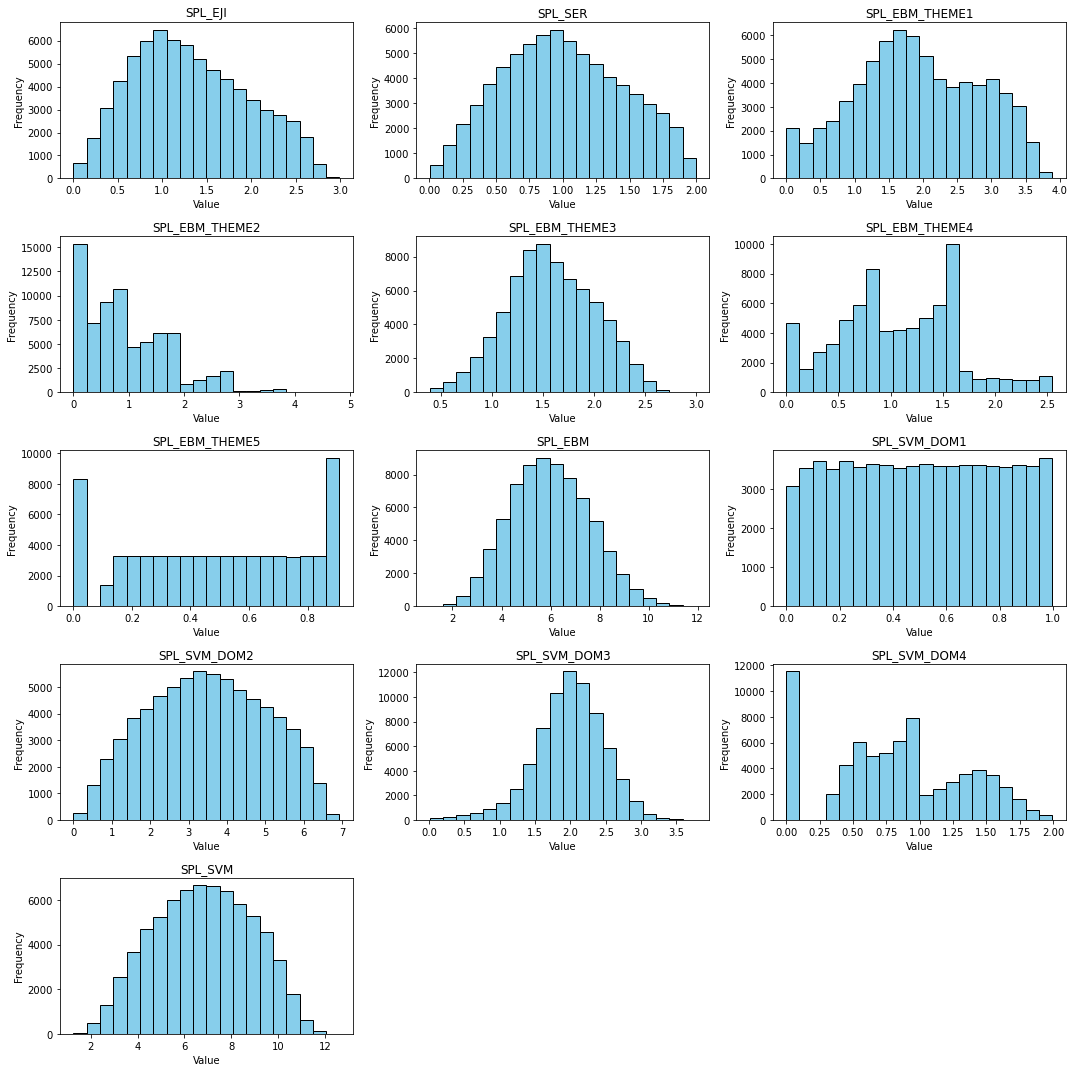

In [89]:
spl_col = [col for col in spl_clean.columns if col.startswith('SPL_')]

# making histograms for each column starting with 'SPL_'
plt.figure(figsize=(15, 15)) 
for i, column in enumerate(spl_col, 1):
    plt.subplot(len(spl_col)//3 + 1, 3, i)
    plt.hist(spl_clean[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

The histograms for each SPL columns allows me to confirm that distributions visually compared to their values from the descriptive statistics. It can also help me see the tails, the peaks, the skewness, and the potential outliers in the data. For example, SPL_EBM_THEME3 and SPL_SVM_DOM3 were shown to have heavier tails and this extreme values which can be seen in their respective histograms here. It is interesting to note that some graphs appear to not be "normally distributed" but had great skew and kurtosis scores like SPL_EBM_THEME4 and SPL_EBM_THEME2.

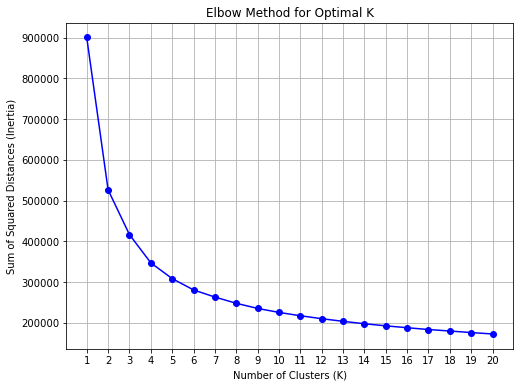

In [90]:
spl_col = [col for col in spl_clean.columns if col.startswith('SPL_')]
X = spl_clean[spl_col]

#empty list to store sum of squared distances
inertia = []

# Perform K-Means for k equals 1-20
for k in range(1, 21):
    #n_init='auto'
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()


The elbow point in the graph indicates the optimal number of clusters to use for K-Means clustering. After the elbow, inertia decreases at a much slower rate. Extra clusters could lead to overfitting of the model. In this graph I believe that 5 clusters is the elbow point and therefore the best number of clusters to have before inertia decreases.

## Clustering and PCA

In [91]:
#print(df_spl.columns)
optimal_k = 5
#spl_data = spl_clean.filter(regex='^SPL_').dropna()  # This drops rows with missing data in SPL columns

'''Performing K-means clustering'''
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
spl_clean['Cluster_Label'] = kmeans.fit_predict(spl_clean.filter(regex='^SPL_').values)

print(spl_clean[['Cluster_Label'] + [col for col in spl_clean.columns if col.startswith('SPL')]].head(25))


    Cluster_Label  SPL_EJI  SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  \
0               3   1.1229   0.9229          2.1531          0.5940   
1               0   1.9108   1.1108          2.1998          0.6609   
2               2   1.6226   1.0226          2.2967          0.5157   
3               1   1.1659   0.7659          2.4259          0.3978   
4               3   0.9289   0.9289          2.4915          0.4588   
5               4   2.2647   1.4647          2.2277          0.8063   
6               0   2.2950   1.4950          2.3506          0.7130   
7               1   1.0758   0.8758          2.0731          1.1520   
8               3   1.2145   0.8145          2.0921          0.3971   
9               3   0.8437   0.6437          1.9929          0.0000   
10              0   1.8953   1.0953          1.8242          1.0292   
11              0   2.0486   1.2486          1.8701          0.9315   
12              0   1.8799   0.8799          1.5755          0.2882   
13    

<ipython-input-91-7787a583b9da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spl_clean['Cluster_Label'] = kmeans.fit_predict(spl_clean.filter(regex='^SPL_').values)


Clustering will help us better identify patterns and groups within the data. It can help see environemntal impacts on different groups of data and communities. In this case it can help us assess by the states or counties in the dataframe and how environemntal impacts effect each of these states or groups of states.

In [92]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import pandas as pd

#sample data
data_pts = spl_clean.sample(n=5000, random_state=42)

# scaling the data
data_features = data_pts.filter(regex='^SPL_').values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

def divisive_clustering(X, distance_threshold=1.5):
    '''Divisive clustering with distance-based stopping criterion'''
    
    clusters = [np.arange(X.shape[0])]  # all data in one cluster (track by indices)
    cluster_labels = np.full(X.shape[0], -1, dtype=int)  #initialize labels with -1 (unlabeled)

    current_cluster_id = 0  # Track current cluster ID for final clusters

    while clusters:
        # Select the largest cluster to split
        largest_cluster_indices = clusters.pop(np.argmax([len(indices) for indices in clusters]))
        largest_cluster_points = X[largest_cluster_indices]  # Points in this cluster

        # Compute pairwise distances within the largest cluster
        pairwise_dist = pairwise_distances(largest_cluster_points)
        farthest_pair_idx = np.unravel_index(np.argmax(pairwise_dist), pairwise_dist.shape)
        max_distance = pairwise_dist[farthest_pair_idx]
        
        # A check to see if we should stop splitting this cluster
        if max_distance < distance_threshold:
            # assigning a cluster label as it's a "final" cluster
            cluster_labels[largest_cluster_indices] = current_cluster_id
            current_cluster_id += 1
        else:
            # split the cluster into two based on the farthest pair
            split_mask = pairwise_dist[:, farthest_pair_idx[0]] < pairwise_dist[:, farthest_pair_idx[1]]
            
            split_cluster_1_indices = largest_cluster_indices[split_mask]
            split_cluster_2_indices = largest_cluster_indices[~split_mask]
            
            #add the new clusters to be processed again
            clusters.append(split_cluster_1_indices)
            clusters.append(split_cluster_2_indices)

    return cluster_labels

# divisive clustering with a distance threshold
cluster_labels = divisive_clustering(data_scaled, distance_threshold=1.5)

# adding the cluster labels to the data
data_pts['Cluster_Label'] = cluster_labels

print('Cluster Label Counts:\n',data_pts['Cluster_Label'].value_counts())
print(data_pts.head(10))


'''The column 'Cluster_labels' isn't the actual number of distinct clusters.
Instead, it reflects the number of splits that occurred until all 
clusters met the stopping criterion which was 1.5 distance. 
data_pts['Cluster_Label'].value_counts() is the number of clusters found via divisive clustering'''

Cluster Label Counts:
 0       5
1       5
2       5
4       4
10      4
       ..
3128    1
1081    1
3132    1
1085    1
2047    1
Name: Cluster_Label, Length: 4152, dtype: int64
       SPL_EJI  SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  SPL_EBM_THEME3  \
38472   0.6052   0.4052          0.0410          0.6366          2.0058   
10382   0.5623   0.5623          1.5297          0.0000          1.3237   
15067   1.0846   1.0846          2.4098          0.5683          1.5527   
66282   0.9662   0.9662          2.3200          1.4999          1.4178   
63136   2.1169   1.5169          2.1498          1.4794          1.8530   
71049   0.6403   0.6403          1.3917          1.4755          1.5790   
65046   1.7055   1.5055          0.5116          1.8689          2.1965   
42065   0.7563   0.7563          1.5673          1.7229          1.4600   
17331   1.1171   1.1171          1.4495          1.5295          0.9275   
21383   1.7077   1.7077          3.5916          0.8577          1.47

"The column 'Cluster_labels' isn't the actual number of distinct clusters.\nInstead, it reflects the number of splits that occurred until all \nclusters met the stopping criterion which was 1.5 distance. \ndata_pts['Cluster_Label'].value_counts() is the number of clusters found via divisive clustering"

K-means clustering is partition-based meaning that it starts with a set number k, in this case 5,
of clusters and iteratively optimizes centroids. The results will be flat output with fixed number of clusters and there is no hierarchy to it. You can see the assigned clusters in the output. Divisive heirarchial clustering builds the clusters on a tree system so that it is split based on distance metrics. There does not need to be a set number of clusters as opposed to k-means. The divissive results should produce a dendogram showing multi-level clusters and are split at different levels. Based on the output the clusters should be 5.

In [93]:
'''This was for the dendogram but it is for Agglomerative clustering, not divise. So it would not work correctly'''

# linked = sch.linkage(data_scaled, method='ward')

# # Plot the dendrogram
# plt.figure(figsize=(10, 7))
# sch.dendrogram(linked)
# plt.title("Dendrogram for Agglomerative (Bottom-Up) Hierarchical Clustering")
# plt.xlabel("Data Points")
# plt.ylabel("Distance")
# plt.show()

# from scipy.cluster.hierarchy import fcluster

# # Set a threshold 
# threshold = 50  # Adjust based on the dendrogram's scale
# clusters = fcluster(linked, threshold, criterion='distance')

# # Add the cluster labels from agglomerative clustering for comparison
# data_pts['Agglomerative_Cluster_Label'] = clusters

# print(data_pts[['Cluster_Label', 'Agglomerative_Cluster_Label'] + [col for col in data_pts.columns if col.startswith('SPL')]].head())

# plt.scatter(data_pts['SPL_EJI'], data_pts['SPL_SER'], c=data_pts['Cluster_Label'], cmap='viridis')
# plt.xlabel('SPL_EJI')
# plt.ylabel('SPL_SER')
# plt.title('Divisive Clustering Results')
# plt.show()


'This was for the dendogram but it is for Agglomerative clustering, not divise. So it would not work correctly'

### My attempt at a divisive dendogram 


In [94]:
#divisive dendogram
print('hello world')
#i did not get very far...

hello world


## PCA Analysis
because 'cluster_labels' was messed up (high cluster points) in the divisive heirarchial clustering I decided to use the cluster labels from my k-means clustering to compute the centeroids. data_pts['Cluster_Label'].value_counts() is the number of clusters found via divisive clustering but I couldn't figure out hwo to replace the column int he dataset with these.

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


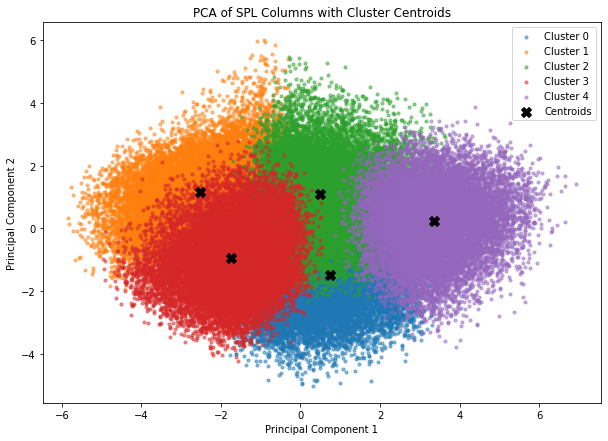

In [95]:
from sklearn.decomposition import PCA

#to check what is in the dataframe
# print(spl_clean.columns)
# print(spl_clean['Cluster_Label'])

# # Perform K-means clustering but don't need to do it again because it is already there
# optimal_k = 5
# kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
# spl_clean['Cluster_Label'] = kmeans.fit_predict(spl_clean.filter(regex='^SPL_').values)

# Filter for the SPL columns
spl_columns = spl_clean.filter(regex='^SPL_').values

# Scale the data
scaler = StandardScaler()
spl_scaled = scaler.fit_transform(spl_columns)

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
spl_pca = pca.fit_transform(spl_scaled)

# Add PCA components to the DataFrame for easier plotting
# spl_clean['PCA1'] = spl_pca[:, 0]
# spl_clean['PCA2'] = spl_pca[:, 1]
spl_clean.loc[:, 'PCA1'] = spl_pca[:, 0]
spl_clean.loc[:, 'PCA2'] = spl_pca[:, 1]

# Calculate centroids of each cluster
centroids = spl_clean.groupby('Cluster_Label')[['PCA1', 'PCA2']].mean()

# Plotting
plt.figure(figsize=(10, 7))
for label in range(optimal_k):
    # Filter data points for each cluster
    cluster_data = spl_clean[spl_clean['Cluster_Label'] == label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {label}', s=10, alpha=0.5)

# Mark centroids
plt.scatter(centroids['PCA1'], centroids['PCA2'], c='black', marker='X', s=100, label='Centroids')

plt.title('PCA of SPL Columns with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


PCA reduces the number of dimensions to just two (or sometimes 3) and it can be plotted easily on a graph for vosualization. By just doing 2 PCAs we can capture the variance of the data, because the first grabs the highest amount of variance and the second the second highest amount of variance.Here we are able to see the 5 distinct clusters. The cluster indicate natural groupings of the data based on the categories in the datasets. The centroids appear to be hovering near zero of boht PCAs and their data points scattred from the centroids. The data points themselves are scattered more across the PCA1 axis than the PCA2 axis suggesting that there is significant variablity in this direction. At the edges of the clusters appears to be some outliers, like in cluster 1 and 2, which show some potential outliers in the data. Given how far apart the centroids are, this shows that they are well defined clusters. because the data points and clusters are well-separated across the 2 PCA components, this says that the two components are good at capturing the key differences between the classes.

## Simulation and Validationn

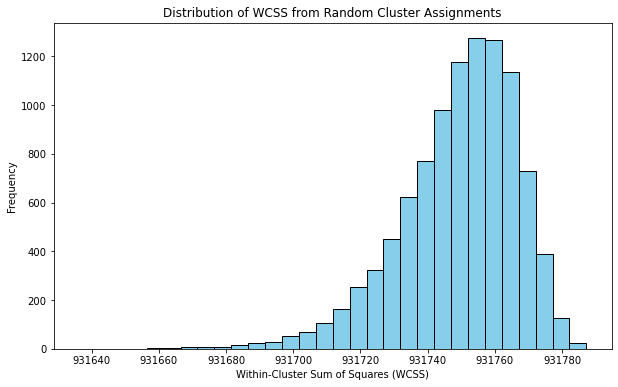

In [96]:
from sklearn.metrics import pairwise_distances_argmin_min

def simulate_random_clusters(data, n_cluster, n_iterations=10000):
    """Simulate random cluster assignments and compute WCSS for each simulation."""
    wcss_values = []
    n_samples = data.shape[0]
    
    for i in range(n_iterations):
        # randomly assign each data point to a cluster
        random_dtpts = np.random.randint(0, n_cluster, n_samples)
        
        # calculate WCSS for this random assignment
        wcss = 0
        for cluster_id in range(n_cluster):
            cluster_points = data[random_dtpts == cluster_id]
            if len(cluster_points) > 0:
                cluster_center = np.mean(cluster_points, axis=0)
                wcss += np.sum((cluster_points - cluster_center) ** 2)
        
        wcss_values.append(wcss)
    
    return wcss_values

n_cluster = 5 
wcss_random = simulate_random_clusters(spl_scaled, n_cluster) #spl_scaled is from above in PCA

# Plotting the histogram of WCSS from random assignments
plt.figure(figsize=(10, 6))
plt.hist(wcss_random, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Within-Cluster Sum of Squares (WCSS)')
plt.ylabel('Frequency')
plt.title('Distribution of WCSS from Random Cluster Assignments')
plt.show()



With simulating random clusters and then calculating WCSS, its creating a distribution of values to reflect what the data might look like if there was no structure. The histogram is right-skewed indicating that that data points are far from the cluster centorids as opposed to close to them. This is genrally normal when there is no real structure. The left tail is the outliers. The histogram distribution is a baseline to assess the quality of the actual clustering results. These results can be used to compare to the K-means model and its caluclated WCSS to see if it is significant. If the WCSS value from the k-means/WCSS model is lower/left than the histogram plotted above, then the clustering solution is capturing real structure in the data.

In [97]:
from sklearn.model_selection import train_test_split

# df_spl is the original DataFrame
spl_clean = df_spl.dropna()
print(spl_clean.columns, "\n\n\n")
spl_columns = spl_clean.filter(regex='^SPL_').values


scaler = StandardScaler()
spl_scaled = scaler.fit_transform(spl_columns)
#print(spl_scaled.columns)
train_data, holdout_data = train_test_split(spl_scaled, test_size=0.15, random_state=42)

# Define optimal_k based on previous analysis or your chosen number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(train_data)

holdout_labels = kmeans.predict(holdout_data)

# Count occurrences of each cluster in the hold-out data
unique, counts = np.unique(holdout_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Cluster Counts in Hold-Out Data:", cluster_counts)



Index(['SPL_EJI', 'SPL_SER', 'SPL_EBM_THEME1', 'SPL_EBM_THEME2',
       'SPL_EBM_THEME3', 'SPL_EBM_THEME4', 'SPL_EBM_THEME5', 'SPL_EBM',
       'SPL_SVM_DOM1', 'SPL_SVM_DOM2', 'SPL_SVM_DOM3', 'SPL_SVM_DOM4',
       'SPL_SVM', 'STATEFP', 'COUNTYFP', 'StateAbbr', 'StateDesc', 'COUNTY',
       'TRACTCE', 'GEOID'],
      dtype='object') 



Cluster Counts in Hold-Out Data: {0: 2518, 1: 2437, 2: 2197, 3: 1648, 4: 1952}


The hold-out data was predicted to have 5 clusters, just like what I believed from the elbow plot a few questions ago. It is important to test clustering results on hold-out data, because we can assess how well the slustering algorithm works and to validate that the clusters defined in the training data are meaningful. Because the clustering model worked well on both training and hold-out data we can say that the clustering is not overfitting the dataset. Clustering models can typically overfit the data, so testing it on hold-out data we can check the clustering model's performance. 